In [353]:
import os
import nltk, string, json
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt

In [354]:
punct = ['“','”','–','’','‘','—','...']
# Statistischee Analysen gesamter Text
with open(os.path.join('Data','RESULTS','sentenceswithnames.txt'),'r',encoding='utf-8') as f:
    content = f.read()
# Anzahl Sätze
sents = nltk.sent_tokenize(content)
amSents = len(sents)
# Anzahl Worte
words = nltk.word_tokenize(content)
amWords = len(words)
# Durchschnittliche Anzahl Worte / Satz
avgWordsperSents = amWords/amSents
print('Durschnittliche Anzahl Worte pro Satz',avgWordsperSents,'\nAnzahl Worte gesamt',amWords,'\nAnzahl Sätze gesamt',amSents)

Durschnittliche Anzahl Worte pro Satz 50.820419325433 
Anzahl Worte gesamt 55750 
Anzahl Sätze gesamt 1097


In [355]:
# Stopwörter entfernen
stop_words = set(stopwords.words('english'))


In [356]:
#Funktionen definieren
# removal-Funktion definieren
def removal(x):
    res = []
    for pair in x:
        count = 0
        for word in pair:
            if word in stop_words:
                count = count or 0
            else:
                count = count or 1
        if (count)==1:
            res.append(pair)
    return res

# ngram-Funktion definieren
def unigram(sents):
    unigram = [] # nur das wort wird beachtet
    toktext = []
    for sentence in sents:
        sentence = ''.join([char for char in sentence if (char not in string.punctuation) and (char not in punct)])
        sentence = sentence.lower()
        sequence = nltk.word_tokenize(sentence)
        for word in sequence:
            unigram.append(word)
        toktext.append(sequence)
    return toktext,unigram

# ngram-Funktion mit POS definieren
def unigrampos(sents):
    unigram = [] # nur das wort wird beachtet
    toktext = []
    for sentence in sents:
        sentence = ''.join([char for char in sentence if (char not in string.punctuation) and (char not in punct)])
        sentence = sentence.lower()
        sequence = nltk.word_tokenize(sentence)
        # POS Tags ermitteln
        sequence = nltk.pos_tag(sequence)
        for word,pos in sequence:
            if pos in ['NN','NNS','NNP','JJ','JJR','JJS','RB','RBR','RBS']: # Nomen, Adverben, Adjektive
                unigram.append(word)
        toktext.append(word)
    return toktext,unigram
    
# ngram-Funktion mit Namen definieren
def unigramnames(sents):
    unigram = [] # nur das wort wird beachtet
    toktext = []
    names = []
    with open(os.path.join('Data','pos','names.json'),'r',encoding='utf-8') as f:
        content = f.read().replace('\xad','')
        n = json.loads(content)
        for key in n.keys():
            names.append(key)
    for sentence in sents:
        sentence = ''.join([char for char in sentence if (char not in string.punctuation) and (char not in punct)])
        sentence = sentence.lower()
        sequence = nltk.word_tokenize(sentence)
        # POS Tags ermitteln
        sequence = nltk.pos_tag(sequence)
        for word,pos in sequence:
            if pos in ['JJ','JJR','JJS','RB','RBR','RBS'] or word in names: # Adverben, Adjektive
                unigram.append(word)
        toktext.append(word)
    return toktext,unigram

# ngram-Funktion mit Namen definieren
def unigramad(sents):
    unigram = [] # nur das wort wird beachtet
    toktext = []
    for sentence in sents:
        sentence = ''.join([char for char in sentence if (char not in string.punctuation) and (char not in punct)])
        sentence = sentence.lower()
        sequence = nltk.word_tokenize(sentence)
        # POS Tags ermitteln
        sequence = nltk.pos_tag(sequence)
        for word,pos in sequence:
            if pos in ['JJ','JJR','JJS','RB','RBR','RBS']: # Adverben, Adjektive
                unigram.append(word)
        toktext.append(word)
    return toktext,unigram

def initngrams(unigram):
    # N-Grams
    bigram = [] # Kontext (2 Worte) wird beachtet
    trigram = []
    fourgram = []
    fivegram = []
    sixgram = []
    # tengram = []

    # n-Grame erstellen 
    bigram.extend(list(ngrams(unigram, 2)))
    trigram.extend(list(ngrams(unigram, 3)))
    fourgram.extend(list(ngrams(unigram, 4)))
    fivegram.extend(list(ngrams(unigram, 5)))
    sixgram.extend(list(ngrams(unigram, 6)))
    
    unigram = removal(unigram)
    bigram = removal(bigram)
    trigram = removal(trigram)
    fourgram = removal(fourgram)
    fourgram = removal(fivegram)
    fourgram = removal(sixgram)
    # tengram = removal(tengram)

    freq_uni = nltk.FreqDist(unigram)
    freq_bi = nltk.FreqDist(bigram)
    freq_tri = nltk.FreqDist(trigram)
    freq_four = nltk.FreqDist(fourgram)
    freq_five = nltk.FreqDist(fivegram)
    freq_six = nltk.FreqDist(sixgram)
    # freq_ten = nltk.FreqDist(tengram)

    print('freq_uni',freq_uni.most_common(100),'\n')
    print('freq_bi',freq_bi.most_common(20),'\n')
    print('freq_tri',freq_tri.most_common(20),'\n')
    print('freq_four',freq_four.most_common(20),'\n')
    print('freq_four',freq_five.most_common(20),'\n')
    print('freq_four',freq_six.most_common(20),'\n')
    # print('freq_ten',freq_ten.most_common(20),'\n')

def getwordfrequency(unigram): # TODO
    x = []
    y = []
    # Stopworte entfernen
    unigram = removal(unigram)
    #Frequenz berechnen
    freq_uni = nltk.FreqDist(unigram)
    # Ergebnisse
    print('freq_uni',freq_uni.most_common(100),'\n')
    for tuple in freq_uni:
        if freq_uni[tuple]>30:
            x.append(tuple) 
            y.append(freq_uni[tuple])
    # print(x,y)
    plt.bar(x,y)
    plt.title("Worthäufigkeiten", loc = 'left')
    plt.xlabel("Wort")
    plt.ylabel("Frequenz")
    plt.xticks(rotation=45)
    plt.show()

freq_uni [('harry', 1408), ('never', 391), ('ron', 173), ('could', 170), ('hermione', 156), ('would', 143), ('back', 127), ('one', 124), ('dumbledore', 119), ('like', 117), ('…', 98), ('snape', 88), ('though', 88), ('much', 82), ('time', 82), ('knew', 77), ('looked', 76), ('seen', 75), ('know', 75), ('still', 74), ('wand', 74), ('around', 73), ('even', 71), ('eyes', 71), ('face', 70), ('get', 69), ('see', 69), ('well', 67), ('voldemort', 65), ('think', 65), ('felt', 63), ('weasley', 61), ('ever', 61), ('might', 61), ('seemed', 61), ('thought', 60), ('voice', 60), ('look', 58), ('got', 58), ('hagrid', 58), ('looking', 57), ('something', 57), ('going', 56), ('room', 56), ('go', 55), ('sirius', 55), ('dont', 54), ('saw', 54), ('head', 54), ('potter', 53), ('heard', 52), ('two', 52), ('come', 51), ('anything', 50), ('right', 47), ('professor', 45), ('way', 45), ('behind', 45), ('made', 44), ('door', 44), ('nothing', 43), ('death', 43), ('away', 42), ('hand', 42), ('dark', 41), ('malfoy', 4

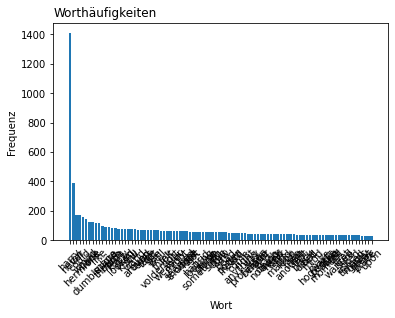

In [357]:
toktext,unigram = unigram(sents)
# Stopworte entfernen 
unigram = [p for p in unigram if p not in stop_words]
# initngrams(unigram)
getwordfrequency(unigram)

freq_uni [('harry', 1106), ('never', 391), ('ron', 140), ('hermione', 138), ('back', 117), ('dumbledore', 107), ('much', 82), ('time', 82), ('snape', 78), ('still', 74), ('even', 71), ('eyes', 70), ('wand', 67), ('well', 66), ('face', 62), ('ever', 61), ('voice', 60), ('weasley', 59), ('voldemort', 59), ('…', 58), ('something', 57), ('room', 56), ('potter', 51), ('anything', 50), ('head', 49), ('hagrid', 48), ('right', 47), ('sirius', 46), ('way', 45), ('door', 43), ('nothing', 43), ('death', 43), ('hand', 42), ('dark', 41), ('professor', 40), ('long', 40), ('little', 40), ('last', 38), ('black', 38), ('malfoy', 37), ('people', 36), ('moment', 36), ('away', 36), ('first', 34), ('feet', 34), ('sure', 34), ('hogwarts', 34), ('great', 32), ('magic', 30), ('front', 30), ('place', 30), ('ive', 29), ('ginny', 29), ('far', 29), ('eater', 29), ('house', 28), ('look', 28), ('night', 28), ('mind', 28), ('good', 28), ('light', 28), ('bit', 27), ('dont', 27), ('many', 27), ('hall', 27), ('enough',

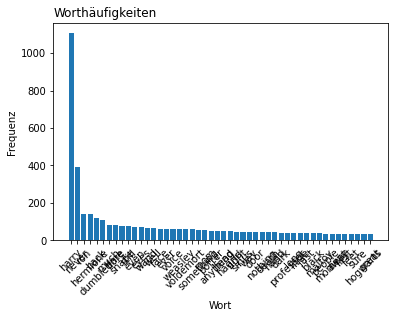

In [358]:
# Filter nach POS
toktextpos,unigrampos = unigrampos(sents)
# print(toktextpos)
# Stopworte entfernen 
unigrampos = [p for p in unigrampos if p not in stop_words]
# initngrams(unigrampos)
getwordfrequency(unigrampos)

In [359]:
# Filter nach Namen
toktextn,unigramn = unigramnames(sents)
print(toktextn)
# Stopworte entfernen 
unigramn = [p for p in unigramn if p not in stop_words]
initngrams(unigramn)
# getwordfrequency(unigramn)

['malfoy', 'mouth', 'forward', 'that', 'desktop', 'angry', 'it', 'restless', 'gryffindor', 'it', 'all', 'dinner', 'lopsided', 'pajamas', 'hermione', 'what', 'stutter', 'last', 'serably', 'by', 'shoulder', 'sad', 'anymore', 'moment', 'forehead', 'feet', 'pocket', 'peas', 'that', 'ushed', 'all', 'desperate', 'hermione', 'hurt', 'voldemort', 'point', 'him', 'did', 'boy', 'today', 'mother', 'jump', 'family', 'said', 'cupboard', 'sleep', 'giant', 'harry', 'magic', 'life', 'before', 'more', 'eyes', 'hagrid', 'surprised', 'hagrid', 'minute', 'interesting', 'telescope', 'own', 'purpose', 'quickly', 'shouldnt', 'life', 'with', 'them', 'alley', 'potter', 'hermione', 'place', 'liked', 'halt', 'words', 'it', 'granger', 'falter', 'doll', 'ared', 'rubbish', 'room', 'upstairs', 'it', 'plate', 'frogs', 'blinked', 'normal', 'room', 'gringotts', 'place', 'hagrid', 'me', 'bench', 'house', 'nervously', 'started', 'years', 'more', 'before', 'all', 'to', 'corridor', 'chin', 'changed', 'answer', 'you', 'avoi

In [360]:
# Filter nach Adjektiven und Adverben
toktexta,unigrama = unigramad(sents)
print(toktexta)
# Stopworte entfernen 
unigrama = [p for p in unigrama if p not in stop_words]
initngrams(unigrama)
# getwordfrequency(unigrama)

['malfoy', 'mouth', 'forward', 'that', 'desktop', 'angry', 'it', 'restless', 'gryffindor', 'it', 'all', 'dinner', 'lopsided', 'pajamas', 'hermione', 'what', 'stutter', 'last', 'serably', 'by', 'shoulder', 'sad', 'anymore', 'moment', 'forehead', 'feet', 'pocket', 'peas', 'that', 'ushed', 'all', 'desperate', 'hermione', 'hurt', 'voldemort', 'point', 'him', 'did', 'boy', 'today', 'mother', 'jump', 'family', 'said', 'cupboard', 'sleep', 'giant', 'harry', 'magic', 'life', 'before', 'more', 'eyes', 'hagrid', 'surprised', 'hagrid', 'minute', 'interesting', 'telescope', 'own', 'purpose', 'quickly', 'shouldnt', 'life', 'with', 'them', 'alley', 'potter', 'hermione', 'place', 'liked', 'halt', 'words', 'it', 'granger', 'falter', 'doll', 'ared', 'rubbish', 'room', 'upstairs', 'it', 'plate', 'frogs', 'blinked', 'normal', 'room', 'gringotts', 'place', 'hagrid', 'me', 'bench', 'house', 'nervously', 'started', 'years', 'more', 'before', 'all', 'to', 'corridor', 'chin', 'changed', 'answer', 'you', 'avoi